In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = yf.download('BTC-USD',start='2018-01-01')

[*********************100%***********************]  1 of 1 completed


In [3]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-31,12897.700195,14377.400391,12755.599609,14156.400391,14156.400391,12136299520
2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000
2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192
2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,16871900160
2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,21783199744
...,...,...,...,...,...,...
2021-08-04,38213.332031,39952.296875,37589.164062,39747.503906,39747.503906,25372562724
2021-08-05,39744.515625,41341.933594,37458.003906,40869.554688,40869.554688,35185031017
2021-08-06,40865.867188,43271.660156,39932.179688,42816.500000,42816.500000,38226483046


In [4]:
def strategy(df, sma1, sma2):
    df = df.copy()
    df['ret'] = np.log(df.Close.pct_change() + 1)
    df['SMA1'] = df.Close.rolling(sma1).mean()
    df['SMA2'] = df.Close.rolling(sma2).mean()
    df = df.dropna()
    df['position'] = np.where(df['SMA1'] > df['SMA2'],1,0)
    df['stratret'] = df['position'].shift(1) * df['ret']
    df = df.dropna()
    return df

In [5]:
strategy(df, 20, 50)

,Open,High,Low,Close,Adj Close,Volume,ret,SMA1,SMA2,position,stratret
Date,,,,,,,,,,,
2018-02-19,10552.599609,11273.799805,10513.200195,11225.299805,11225.299805,7652089856,0.061874,9103.446533,11550.002637,0,0.000000
2018-02-20,11231.799805,11958.500000,11231.799805,11403.700195,11403.700195,9926540288,0.015768,9162.576563,11504.932637,0,0.000000
2018-02-21,11372.200195,11418.500000,10479.099609,10690.400391,10690.400391,9405339648,-0.064592,9238.569580,11419.098652,0,-0.000000
2018-02-22,10660.400391,11039.099609,9939.089844,10005.000000,10005.000000,8040079872,-0.066261,9297.282080,11315.178652,0,-0.000000
2018-02-23,9937.070312,10487.299805,9734.559570,10301.099609,10301.099609,7739500032,0.029166,9353.591553,11209.216641,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2021-08-04,38213.332031,39952.296875,37589.164062,39747.503906,39747.503906,25372562724,0.040943,36035.622559,34895.159219,1,0.040943
2021-08-05,39744.515625,41341.933594,37458.003906,40869.554688,40869.554688,35185031017,0.027838,36508.023340,34945.609062,1,0.027838
2021-08-06,40865.867188,43271.660156,39932.179688,42816.500000,42816.500000,38226483046,0.046538,37072.194922,35040.868984,1,0.046538


In [6]:
def performance(df):
    return np.exp(df[['ret','stratret']].sum())

In [10]:
performance(strategy(df, 20, 50))

ret         4.082257
stratret    6.339641
dtype: float64

In [11]:
stratdf = strategy(df,20,50)

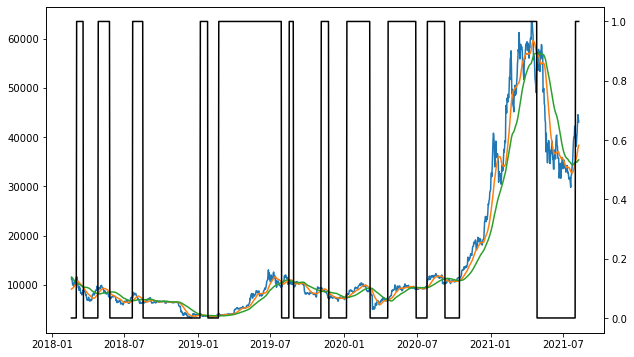

In [13]:
fig,ax = plt.subplots(figsize=(10,6))
ax2 = ax.twinx()
ax.plot(stratdf[['Close','SMA1','SMA2']])
ax2.plot(stratdf['position'], color='k')

In [14]:
SMA_list1 = range(30,101,5)
SMA_list2 = range(130,201,5)

In [18]:
def Tester(SMA_list1, SMA_list2):
    profits = []
    a, b = [], []

    for i,e in zip(SMA_list1, SMA_list2):
        profit = performance(strategy(df, i, e))
        profits.append(profit)
        a.append(i)
        b.append(e)
        
    col = {'level_0':'SMA1','level_1':'SMA2'}
    frame = pd.DataFrame(profits, [a,b]).reset_index().rename(columns=col)
    frame['edge'] = frame.stratret - frame.ret
    return frame.sort_values('edge',ascending=False)

In [19]:
Tester(SMA_list1, SMA_list2)

,SMA1,SMA2,ret,stratret,edge
12,90,190,6.359008,7.128300,0.769292
1,35,135,4.941631,5.559852,0.618221
0,30,130,4.619231,4.837887,0.218657
2,40,140,5.223017,4.972429,-0.250587
13,95,195,6.905228,6.402387,-0.502841
11,85,185,6.596916,5.436628,-1.160288
3,45,145,5.677241,4.501120,-1.176121
14,100,200,5.844043,4.561966,-1.282077
6,60,160,5.649260,4.116309,-1.532951
5,55,155,5.579503,3.754266,-1.825236
